<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week4ml/sol/d5/PolyDogeKNNChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score

In [50]:
df = pd.read_csv('CC_GENERAL.csv')

In [51]:
kk = df.sample(n=50)

In [52]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [53]:
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace=True)

In [54]:
df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].mean()), inplace=True)

In [55]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [56]:
points = df.iloc[:,1:]
pointss = points.values
type(points)

pandas.core.frame.DataFrame

In [57]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [58]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

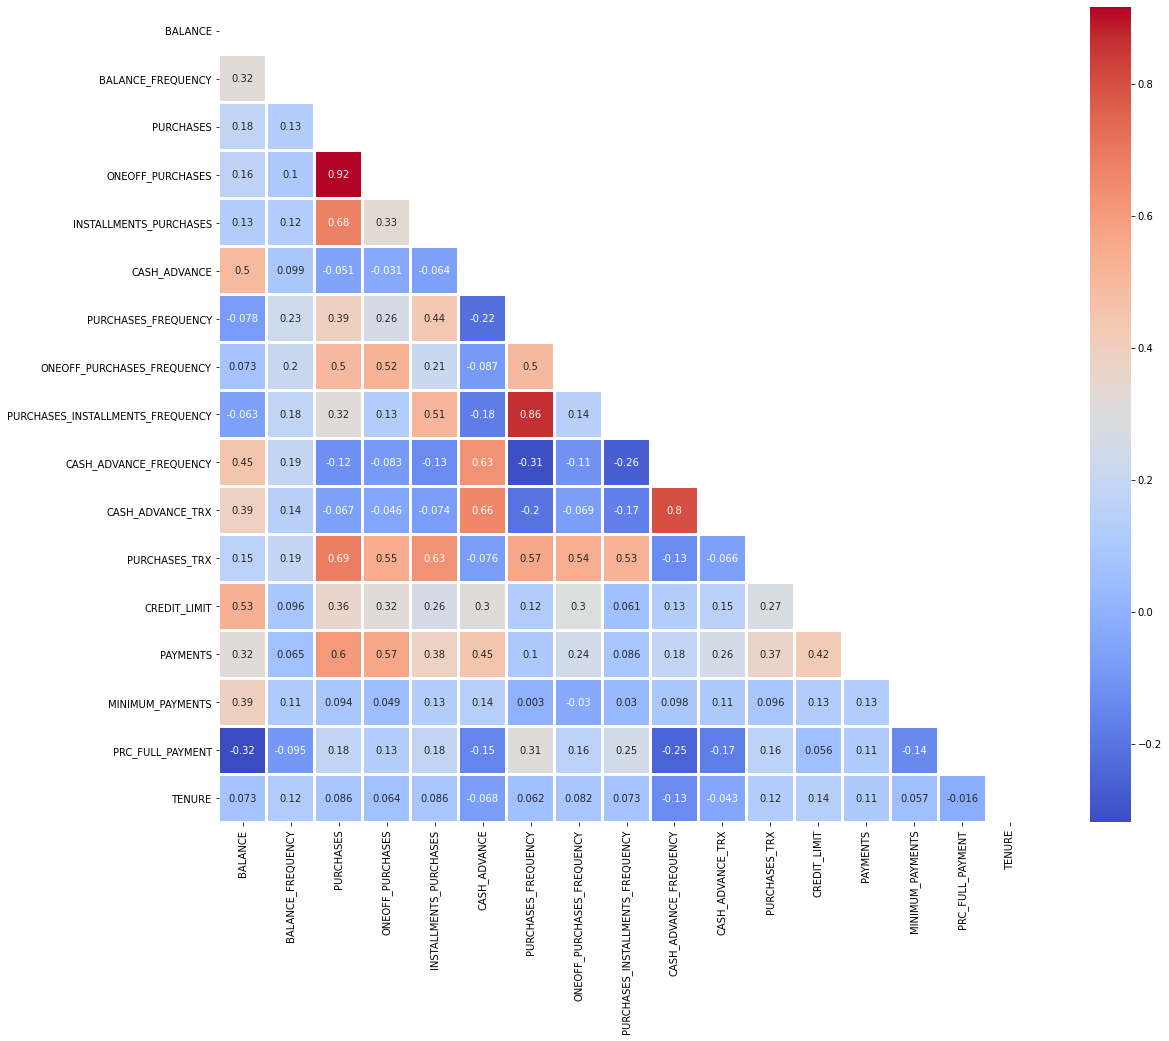

In [59]:
corr = df.corr()
plt.figure(figsize=(20, 15))
matrix = np.triu(df.corr())
sns.heatmap(corr,annot=True,fmt=".2",cmap= 'coolwarm',linewidths=2,square = True,mask = matrix)

In [60]:
points.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [61]:
df4 = df.filter(["ONEOFF_PURCHASES","PURCHASES","PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX"], axis=1)
df2 = df.filter(["PAYMENTS","MINIMUM_PAYMENTS","BALANCE_FREQUENCY", "BALANCE"], axis = 1)

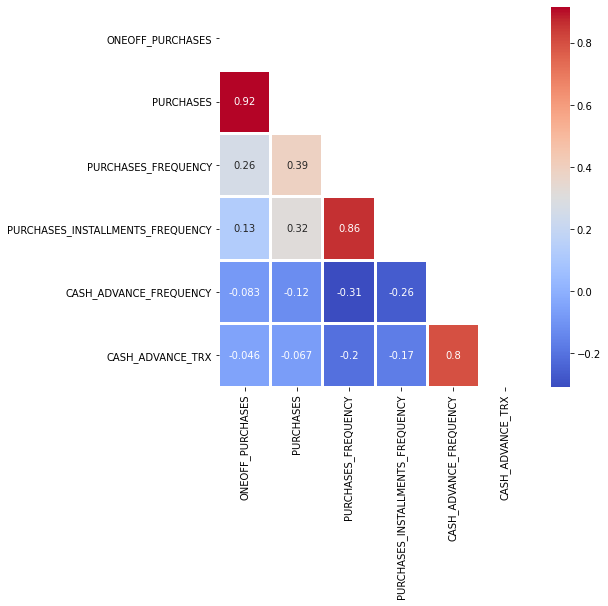

In [62]:
matrixx = np.triu(df4.corr())
plt.figure(figsize=(7, 7))
pp = sns.heatmap(df4.corr(),annot= True,mask = matrixx, cmap = "coolwarm", linewidths=2 )#square = True, linecolor = "white",


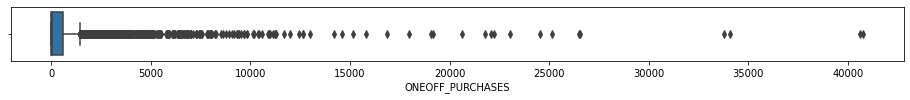

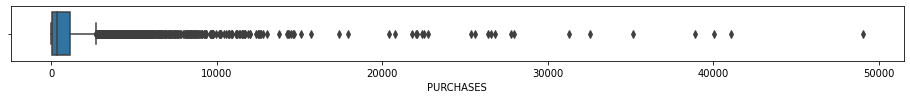

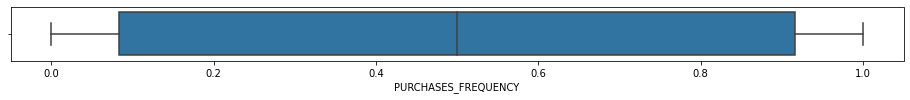

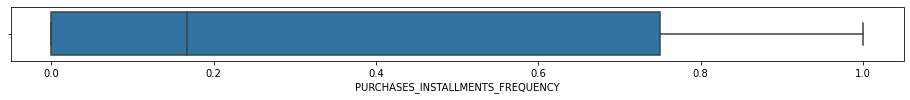

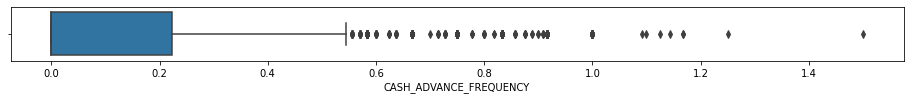

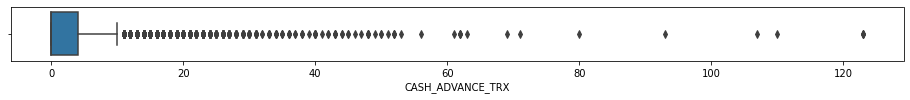

In [63]:
num_vars = ["ONEOFF_PURCHASES","PURCHASES","PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX"]
for i in num_vars:
    plt.figure(figsize=(16,1))
    sns.boxplot(x=df[i])

In [64]:
pca = PCA() 
pcadf = pca.fit_transform(points) 
pcadf = pd.DataFrame(pcadf) 
pcadf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-4326.383956,921.566884,183.708365,-168.948265,47.629700,14.660088,-63.755564,4.499989,-0.174324,-1.334620,-0.688616,0.360680,0.092463,-0.047816,-0.031412,0.073528,0.014863
1,4118.916676,-2432.846347,2369.969306,-3922.117128,59.029537,-1451.882732,87.490230,3.364885,0.072957,-10.607948,-0.898103,0.263254,-0.083394,0.158308,-0.121684,0.000715,-0.030829
2,1497.907660,-1997.578692,-2125.631345,1028.943565,-313.696195,392.689435,-582.394220,0.147474,0.007910,-1.234194,-0.274760,-0.253714,-0.579853,-0.627656,0.275763,0.084874,0.175324
3,1394.548556,-1488.743450,-2431.799668,1594.073673,-302.200788,-845.620767,-677.930246,15.132790,0.093968,-0.254381,-0.535238,0.426708,0.213688,0.081051,0.102744,0.000720,-0.002718
4,-3743.351874,757.342659,512.476474,-243.154764,-237.678261,569.602810,-229.334017,4.537312,-0.127504,-1.630469,-0.601685,0.380670,-0.039238,-0.107504,-0.154637,0.099078,-0.034255


In [94]:
X = points.copy()
X = np.nan_to_num(X)
Clust = StandardScaler().fit_transform(X)
Clust.shape

(8950, 17)

In [66]:
y = np.zeros(8950)
X_train, X_test, _, _ = train_test_split( X, y, test_size=0.2, random_state=0)

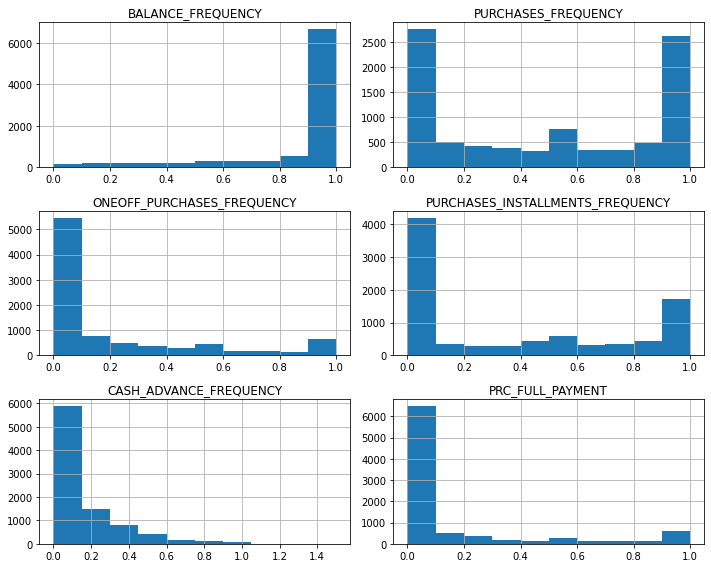

In [72]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(points,
width=2000, height=3000)
fig.show()

In [160]:
def kmeanss(k, X):
    fg, ax = plt.subplots(2, 2, figsize=(10, 7))
    sns.scatterplot(X[:, 0], X[:, 1], ax=ax[0, 0])
    '''
    given an input k, returns the model trained on k and the data
    to plot the inertia in the interval around +- 3
    '''
    if k > 3:
        interval = range(k-3, k+4)
    else:
        interval = range(1, k+4)
    inertia = []
    for i in interval:
        kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
        inertia.append(kmeans.inertia_)
    
    model = KMeans(n_clusters=k, random_state=0)
    labelss = kmeans.labels_
    clusters=pd.concat([points, pd.DataFrame({'cluster':labelss})], axis=1)
    pca = PCA(n_components = 2) 
    pcadf = pca.fit_transform(Clust) 
    pcadf = pd.DataFrame(pcadf) 
    pcadf.columns = ['PC1', 'PC2']   
    f_Df = pd.concat([pcadf, pd.DataFrame({'cluster':labelss})], axis = 1)
    plt.figure(figsize=(15,10))
    axx = sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=f_Df)
    sns.lineplot(interval, inertia, marker='o', ax=ax[0, 1])
    #fig = go.Figure(data=go.Scatter(x=np.arange(1,i),y=inertia))
    #fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,i],title="Cluster Number"),yaxis={'title':'Inertia'},annotations=[])
    plt.show()
    return model, inertia, labelss

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



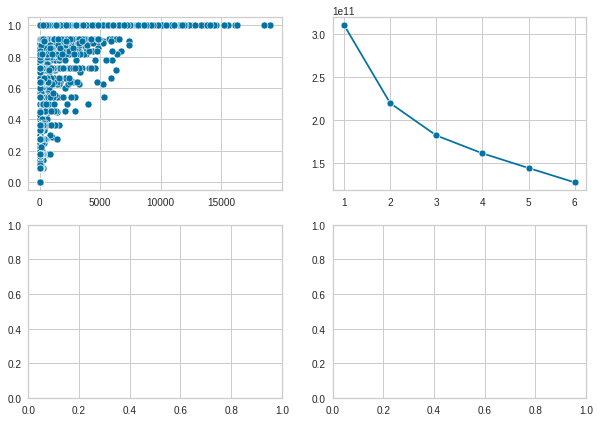

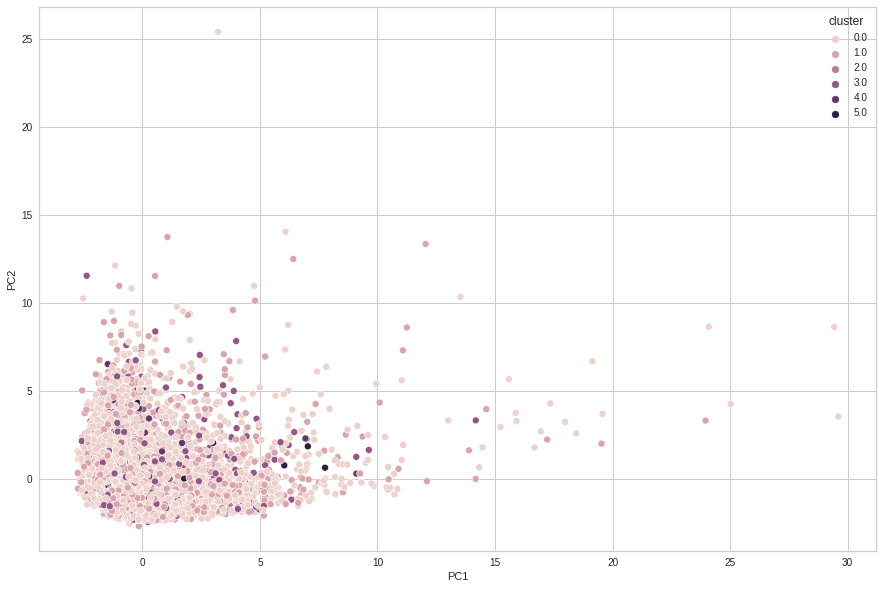

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=0, tol=0.0001, verbose=0),
 [310023889180.2866,
  219748482381.55087,
  182410600070.72983,
  161716986599.848,
  144763214774.87546,
  128148850729.34764],
 array([1, 1, 0, ..., 1, 3, 0], dtype=int32))

In [161]:
kmeanss(3,X_train)

In [ ]:
clusters.head()

In [69]:
"""def test_pipeline(df_train, K):
  Clust = StandardScaler().fit_transform(X)
  pcadf
  fg, ax = plt.subplots(2, 2, figsize=(10, 7))
"""

In [71]:
#mergins = sch.linkage(X_train[:,:5], 'complete')
#dn = sch.dendrogram(mergins, leaf_rotation = 90, leaf_font_size=6)

In [148]:

scaler = MinMaxScaler()
scaler.fit(pointss)
X=scaler.transform(pointss)
inertiaa = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=0
    )
    kmeans.fit(X)
    inertiaa.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertiaa))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[

    ])

In [97]:
pca = PCA() 
pcadf = pca.fit_transform(Clust) 
pcadf = pd.DataFrame(pcadf) 

"""centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)"""

"centroids = kmeans.cluster_centers_\nplt.scatter(centroids[:, 0], centroids[:, 1],\n            marker='o', s=10, linewidths=3,\n            color='w', zorder=10)"

In [ ]:
pca = PCA(n_components = 2) 
pcadf = pca.fit_transform(Clust) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['PC1', 'PC2']   
pcadf.head()

In [75]:
#Creating evaluate function to evaluate our models performance
def evaluate(model, points, silhouette_visualizer=False):
  """
  Plotting Silhouette Diagram or Silhouette Visualizer, print Silhouette Score and Davies Bouldin Score to evaluate your model performance.

  Parameters:
  model : pass your estimator with model argument to this function.
  data : data is your dataframe which is going to be trained.
  silhouette_visualizer : defualt is False, you can plot silhouette diagram by passing True. 
  """
  if silhouette_visualizer:
    from yellowbrick.cluster import SilhouetteVisualizer

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(points)

  kk = model.fit_predict(points)


  SC = "Silhouette Score"+" : "+str("{:.2f}".format(silhouette_score(points, kk)))
  DBC = "Davies Bouldin Score"+" : "+str("{:.2f}".format(davies_bouldin_score(points, kk)))


  print(SC)
  print(DBC)

Silhouette Score : 0.36
Davies Bouldin Score : 1.04


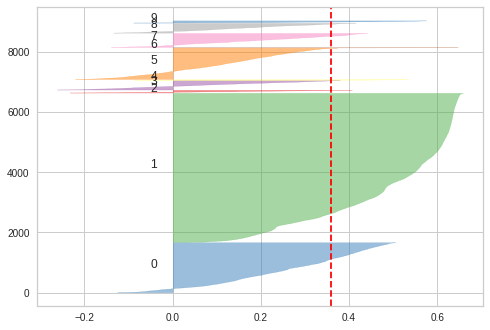

In [76]:
evaluate(kmeans, pcadf, silhouette_visualizer=True)

In [78]:
def plot_model_clustering(model, points):
  plt.figure(figsize=(15,7))
  model.fit(points)
  labels= model.labels_
  X['labels']= labels
  ax = sns.scatterplot(x='PC1', y='PC2', hue='labels', data=df_label, palette='bright')
  for index in range(len(str(model))):
    if str(model)[index] == '(':
      ind = index
  ax.set_title(str(model)[:ind])

  #evaluate(model, vals)

In [ ]:
plot_model_clustering(kmeans, pcadf)

In [90]:
cluster = 5

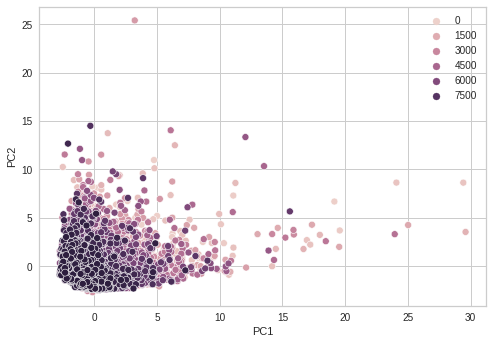

In [107]:
ax = sns.scatterplot(x="PC1", y="PC2", data=pcadf,hue = range(8950))

In [ ]:
def main():
    pass

st.title('Polygon')
st.subheader('This is a simple app to cluster credit card customers in the groups')
img = Image.open("C:/Users/emrre/polydoge/doge.png")
st.image(img, width=400, use_column_width=True)
st.write("Select the cluster numbers (k parameters)")

level = st.slider("Select the level", 1, 12)
dx_train, dx_test, fg = pipeline(df_train, df_test, level)

st.pyplot(fg)

st.write("The dataframe with the identified clusters is:")
st.dataframe(dx_train)